I'll create some practice scenarios for you. For each one, try to:
1. Write the null and alternative hypotheses
2. Identify if groups are independent/dependent
3. I'll tell you if the data is normal/non-normal
4. Select the appropriate test based on these factors

Question 1:
A researcher wants to compare the average daily steps between male and female college students.
* Data: Daily step counts for 30 males and 30 females
* Normality test shows: Normal distribution (p > 0.05)

Question 2:
A doctor is studying blood pressure readings before and after administering a new medication to 25 patients.
* Data: Systolic blood pressure measurements
* Normality test shows: Non-normal distribution (p < 0.05)

Question 3:
A company wants to know if their employees' actual working hours differ from the standard 40-hour work week.
* Data: Weekly working hours of 50 employees
* Normality test shows: Normal distribution (p > 0.05)

Question 4:
A fitness trainer is comparing weight loss between two different diet programs (Program A and Program B).
* Data: Weight loss after 8 weeks for 20 people in each program
* Normality test shows: Non-normal distribution (p < 0.05)

Would you like to try answering any of these? We can go through them one by one, and I can help guide your thinking process.

Statistical tests

1. Load Data

2. State hypothesis and significance
- Null hypothesis - no difference between groups or no relationship between variables
- Alternative hypotheses - claim - what u expect ur data to show

3. Data statistics and plotting (KDE - real data, bar plot - discrete)
- look for number of samples
- mean value/median
- Plotting: real number plotting, discrete values plotting
- KDE, bar, regression - scatter plot

4. Remove outliers if any

5. check for normality
- 1. if the normality test passes then use t-test 
    -- otherwise, 
    - bwtween subjects(2 different groups): use Mann-Whitney U test for independent t-test
    - within subjects(same related group): use Wicoxon test

    - single sample, binomial
    - independent t-test , man-whitney ( 2 groups on 2 different conditions)
    - paired t-test, wicoxon test (related group on 2 conditions looking at the same time)
    - more than 2 groups : Anova test

6. Based on alternative hypothesis, normality test justify the chosen test

7. conduct the test
- alternative = 'two-sided'

8. Report on test
- sample size
- hypothesis
- significance level
- test name 

Example:

Reporting the result, a wilcoxon's signed-rank test showed that hypotherapy significantly reduces anxiety scores(Mdn=15) compared to pre-therapy(Mdn=22) W = 322, p<0.001

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math
import pandas as pd

In [10]:
# 1. Load data
file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\Wilcoxons rank.csv'

df = pd.read_csv(file_path)

print(df.describe())


# if data is true or false (discrete) then conduct the binomial 
# if it has one class then conduct one-sample test

# Since data is continuous, 2 class related group conduct : paired-t-test or wicoxcon test


       Pre-anxiety  Post-anxiety
count    29.000000     29.000000
mean     21.034483     14.827586
std       5.766175      3.306584
min      10.000000      8.000000
25%      17.000000     13.000000
50%      22.000000     15.000000
75%      25.000000     18.000000
max      32.000000     21.000000


2. State hypothesis and significance

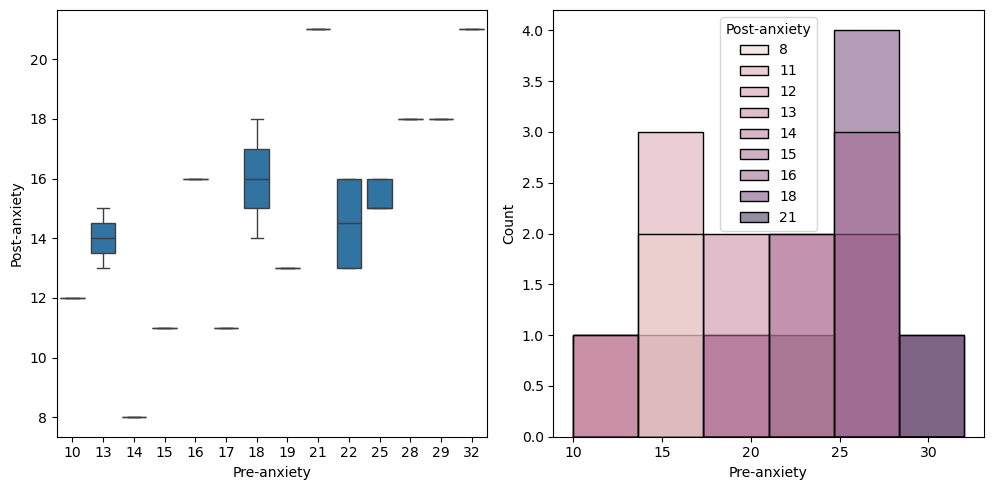

In [27]:
# 3. Plot - bar plot for discrete, KDE/histplot for continuous data
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x='Pre-anxiety', y='Post-anxiety', data=df)
plt.subplot(1,3,2)
sns.histplot(data=df, x='Pre-anxiety', hue='Post-anxiety', alpha=0.5)
# plt.subplot(1,3,3)
# sns.barplot(data=df, x='Pre-anxiety', y='Post-anxiety')
plt.tight_layout()
plt.show()


In [35]:
def remove_outliers(group):
    Q1 = group['Post-anxiety'].quantile(0.25)
    Q3 = group['Post-anxiety'].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound  = Q3 + 1.5 * IQR

    outliers = group[(group['Post-anxiety'] < lower_bound) | (group['Post-anxiety'] > upper_bound)]
    return outliers

for pre_anx in df['Pre-anxiety'].unique():
    pre_anx_group = df[df['Pre-anxiety'] == pre_anx]
    outliers = remove_outliers(pre_anx_group)
    print(len(outliers))

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [40]:
for anx in df['Pre-anxiety'].unique():
    # stat, p_value = stats.shapiro(df[df['Pre-anxiety'] == anx]['Post-anxiety'])
    print(anx)
    # print(stat, p_value)


16
21
32
13
18
17
22
25
28
29
10
15
14
19


In [47]:
shapiro_pre = stats.shapiro(df['Pre-anxiety'])

print(shapiro_pre)

shapiro_post = stats.shapiro(df['Post-anxiety'])

print(shapiro_post)

ShapiroResult(statistic=0.9658655857973096, pvalue=0.45374413394067614)
ShapiroResult(statistic=0.9613889900403882, pvalue=0.3555131580274171)


In [48]:
stats.wilcoxon(shapiro_pre, shapiro_post, alternative='two-sided')

WilcoxonResult(statistic=0.0, pvalue=0.5)

2. Example: Paired t-test.csv


In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import glob
import math


In [67]:
file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\Paired t-test.csv'

df = pd.read_csv(file_path)
print(df.describe)

# print(f'{df.head=}, {df.describe=}', {df.sample} )

<bound method NDFrame.describe of     Pre diet body mass  Post 4 weeks diet 
0                   60                  60
1                  103                 103
2                   58                  54
3                   60                  54
4                   64                  63
..                 ...                 ...
73                  83                  80
74                  84                  80
75                  85                  80
76                  87                  78
77                  88                  82

[78 rows x 2 columns]>


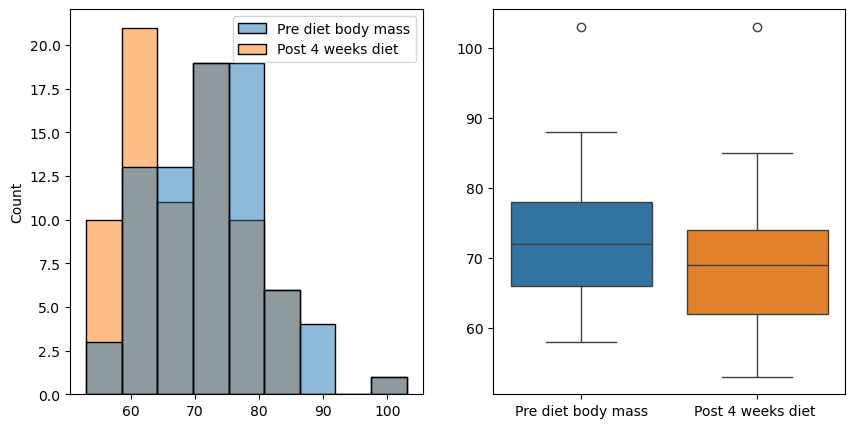

In [85]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
# plt.boxplot(data=df, x='Pre diet body mass')
sns.histplot(data=df)
plt.subplot(1,2,2)
# sns.violinplot(data=df,  x='Pre diet body mass',  y='Post 4 weeks diet ')
# stats.probplot(df['Post 4 weeks diet '], dist='norm', plot=plt)
sns.boxplot(data=df)
# sns.countplot(data=df, )
plt.show()

In [91]:
def remove_outliers(group):
    q1 = group['Pre diet body mass'].quantile(0.25)
    q3 = group['Pre diet body mass'].quantile(0.75)

    iqr = q3 -q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Pre diet body mass'] < lower_bound) & (group['Pre diet body mass']> upper_bound)]
    return outliers

for diet in df['Post 4 weeks diet '].unique():
    diet_group = df[df['Post 4 weeks diet '] == diet]
    outliers = remove_outliers(diet_group)
    print(len(outliers))


from scipy.stats import iqr

# Compute IQR for each treatment group
Q1 = df.groupby("Pre diet body mass")["Pre diet body mass"].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby("Pre diet body mass")["Pre diet body mass"].transform(lambda x: x.quantile(0.75))
IQR = df.groupby("Pre diet body mass")["Pre diet body mass"].transform(iqr)

# Define outlier bounds
outliers = df[(df["Pre diet body mass"] < Q1 - 1.5 * IQR) | (df["Pre diet body mass"] > Q3 + 1.5 * IQR)]

print(len(outliers))


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [105]:
from scipy.stats import iqr

q1 = df.groupby('Pre diet body mass')['Post 4 weeks diet '].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Pre diet body mass')['Post 4 weeks diet '].transform(lambda x: x.quantile(0.75))
IQR = q3 - q1  # Compute IQR directly

# Remove outliers by filtering non-outlier values
df_no_outliers = df[(df['Post 4 weeks diet '] >= q1 - 1.5 * IQR) & (df['Post 4 weeks diet '] <= q3 + 1.5 * IQR)]

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after outlier removal: {len(df_no_outliers)}")


# q1 = df.groupby('')[''].transform(lambda x: x.quantile(0.25))
# q3 = df.groupby('')[''].transform(lambda x: x.quantile(0.75))
# IQR = df.groupby('')[''].transform(iqr)

# has_outliers = df[(df[''] < q1 - 1.5 * IQR) | (df[''] < q3 + 1.5 * IQR)]

Original dataset size: 78
Dataset size after outlier removal: 75


In [116]:
# for d in df['Post 4 weeks diet '].unique():
stat, p_val = stats.shapiro(df['Post 4 weeks diet '])
print( stat, p_val)
stat, p_val = stats.shapiro(df['Pre diet body mass'])
print(stat, p_val)

0.9582453047151738 0.01196105092441074
0.969172309581655 0.05540671654516982


In [114]:
# Either one of the p-value is greater than 0.05 then it is normally distributed

In [115]:
# since it is related group, 2 classes, conduct paired-t-test
# since it passed normality test - we are conducting paired t-test otherwise conduct wilcoxon test 

In [119]:
t_stats, t_p = stats.ttest_rel(df['Post 4 weeks diet '], df['Pre diet body mass'])

print(t_stats, t_p)

-13.039100475969931 3.513805365363995e-21


In [122]:
# since the p_value is greater than 0.05. failed to reject null hypothesis(H0)

# 3. Example : Binomial test

In [136]:
# load data
file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\Binomial.csv'

df = pd.read_csv(file_path)


In [125]:
# data describe
df.describe()

,Laptop
count,90
unique,2
top,Windows
freq,54


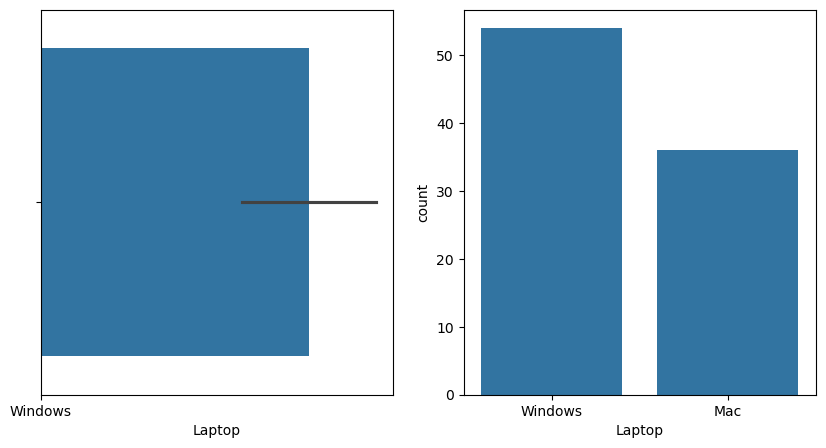

In [146]:
#Plot 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data = df, x='Laptop')
plt.subplot(1,2,2)
sns.countplot(data=df, x = 'Laptop')
plt.show()

No need to remove outliers for discrete values with binomial test

In [ ]:
# remove outliers
# from scipy.stats as iqr

# q1 = df['Laptop']('').transform(lambda x: x.quantile(0.25))
# q3 = df['Laptop']('').transform(lambda x: x.quantile(0.75))

# IQR = df[]().transform(iqr)

# has_outliers = df[(df['Laptop'] >= Q1 - 1.5 * IQR) | (df[''] <= Q3 + 1.5 * IQR)]

In [157]:
# Perform binomial test
total_len = len(df)
windows = df[df['Laptop'] == 'Windows']
t_stats = stats.binomtest(len(windows), len(df), p=0.5)
print(t_stats)

BinomTestResult(k=54, n=90, alternative='two-sided', statistic=0.6, pvalue=0.07254953219246177)


BinomTestResult(k=54, n=90, alternative='two-sided', statistic=0.6, pvalue=0.07254953219246177)

As p_val is < 0.05 the statistacal test failed to reject null hypotheses

In [158]:
# 4. Example: Anova test Repeated ANOVA cholesterol.csv

In [161]:
file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\Repeated ANOVA cholesterol.csv'

df = pd.read_csv(file_path)


In [162]:
df.describe()

,Participant,Week 0,Week 3,Week 6
count,18.000000,18.000000,18.000000,18.000000
mean,9.500000,6.407778,5.841667,5.778889
std,5.338539,1.191087,1.123352,1.101912
min,1.000000,3.910000,3.700000,3.660000
25%,5.250000,5.740000,5.175000,5.210000
50%,9.500000,6.500000,5.830000,5.730000
75%,13.750000,7.217500,6.730000,6.687500
max,18.000000,8.430000,7.710000,7.670000


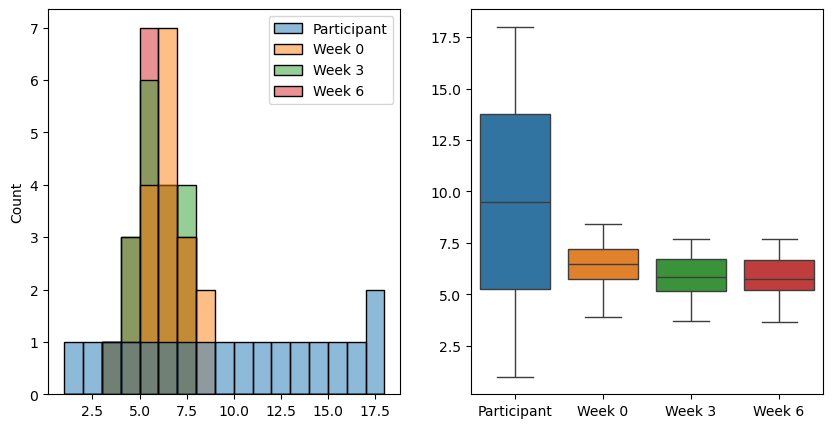

In [168]:
# Plot

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df)
plt.subplot(1,2,2)
sns.boxplot(data=df)
plt.show()

In [177]:
# removal of outliers
from scipy.stats import iqr

q1 = df.groupby('Participant')['Week 0'].transform(lambda x: x.quantile(0.25))
q3 = df.groupby('Participant')['Week 3'].transform(lambda x: x.quantile(0.75))

IQR = df.groupby('Participant')['Week 6'].transform(iqr)

has_outliers = df[(df['Week 0'] >= q1 - 1.5 * IQR) | df['Week 0'] <=q3 + 1.5 * IQR]

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after outlier removal: {len(has_outliers)}")


Original dataset size: 18
Dataset size after outlier removal: 18


In [195]:
# check for shapiro for normality test

shap_week0 = df['Week 0']
shap_week3 = df['Week 3']
shap_week6 = df['Week 6']
shapiro_t = stats.shapiro(shap_week0)
shapiro_t3 = stats.shapiro(shap_week3)

shapiro_t6 = stats.shapiro(shap_week6)
print(shapiro_t, shapiro_t3, shapiro_t6)


ShapiroResult(statistic=0.9819002058496172, pvalue=0.9674666629288775) ShapiroResult(statistic=0.9768681799770268, pvalue=0.912098124406983) ShapiroResult(statistic=0.9773253906799733, pvalue=0.9183030936721103)


In [198]:
# ShapiroResult(statistic=0.9819002058496172, pvalue=0.9674666629288775) ShapiroResult(statistic=0.9768681799770268, pvalue=0.912098124406983) ShapiroResult(statistic=0.9773253906799733, pvalue=0.9183030936721103)

# since all the p vals are > 0.05  it is normally distributed

# more than 2 classes -> So conduct anova test

In [202]:
anova_t = stats.f_oneway(df['Participant'], df['Week 0'], df['Week 3'], df['Week 6'])

print(anova_t)

F_onewayResult(statistic=6.947746541028756, pvalue=0.00037947676917558787)


# 5. Example: One sample t-test.csv

In [204]:
file_path = r'C:\Users\palla\Downloads\hcir-lecturtes\lecture-11-statistical_test_slides_exercises_Jan2025_final\statistical_test_slides_exercises_Jan2025_final\Data-for-handbook-upload\One sample t-test.csv'
df = pd.read_csv(file_path)

In [205]:
df.describe()

,mass,height
count,23.000000,23.000000
mean,72.913043,177.608696
std,7.025363,4.915089
min,64.000000,167.000000
25%,66.500000,175.000000
50%,73.000000,178.000000
75%,77.500000,181.000000
max,88.000000,187.000000


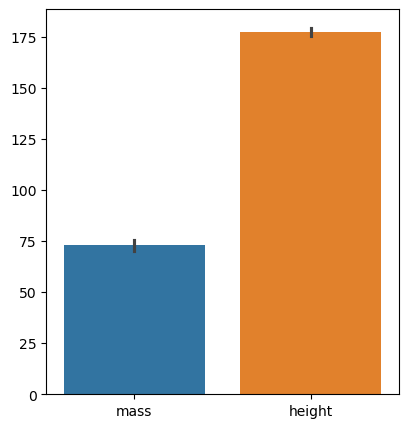

In [210]:
# plot

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(data=df)
plt.show()
